In [31]:
#留下欄位SK_ID_PREV,SK_ID_CURR, NAME_CONTRACT_TYPE,AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_CASH_LOAN_PURPOSE, NAME_CONTRACT_STATUS, CODE_REJECT_REASON, NAME_CLIENT_TYPE, NAME_PORTFOLIO

#用SK_ID_CURR 合到Train

In [32]:
#Ask teacher - same column name between Train & Previous but different data how to handle <1>AMT_ANNUITY <2>AMT_CREDIT <3>AMT_GOODS_PRICE
#pick one? or need to deep in to analysis?

# Previous Overlook

In [8]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
pre_app = pd.read_csv("previous_application.csv")

In [10]:
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
pre_app.shape

(1670214, 37)

In [12]:
# 每列的SK_ID_PREV都不一樣 ∵跟 data數量一樣
pre_app.apply(lambda x: x.unique().shape[0])

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357960
AMT_APPLICATION                  93885
AMT_CREDIT                       86804
AMT_DOWN_PAYMENT                 29279
AMT_GOODS_PRICE                  93886
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207034
RATE_INTEREST_PRIMARY              149
RATE_INTEREST_PRIVILEGED            26
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      8
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE             

# Detail of Column

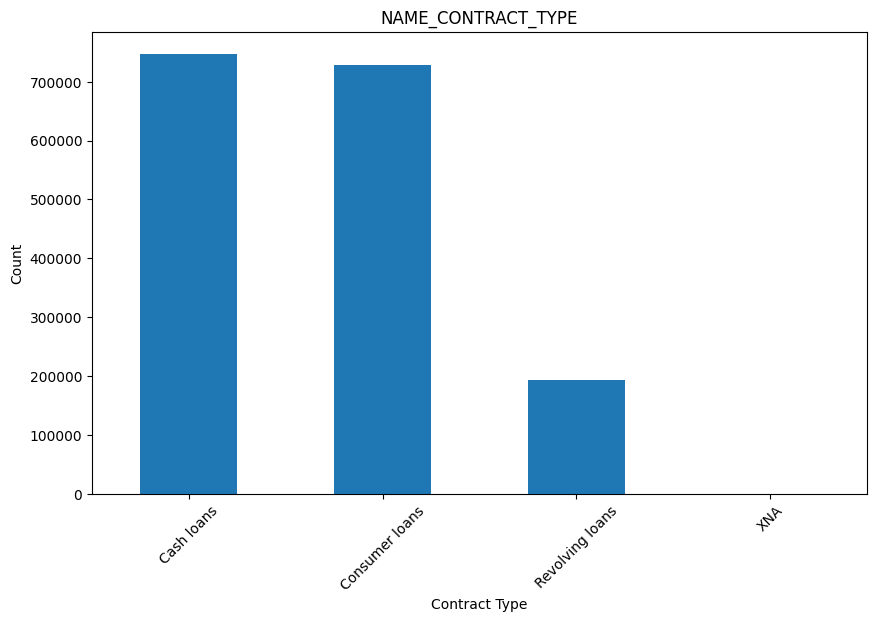

In [13]:
#NAME_CONTRACT_TYPE 貸款類型
import pandas as pd
import matplotlib.pyplot as plt

file_path = "previous_application.csv"
data = pd.read_csv(file_path)

contract_type_counts = data['NAME_CONTRACT_TYPE'].value_counts()

# Create a bar chart to visualize the analysis
plt.figure(figsize=(10, 6))
contract_type_counts.plot(kind='bar')
plt.title('NAME_CONTRACT_TYPE')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

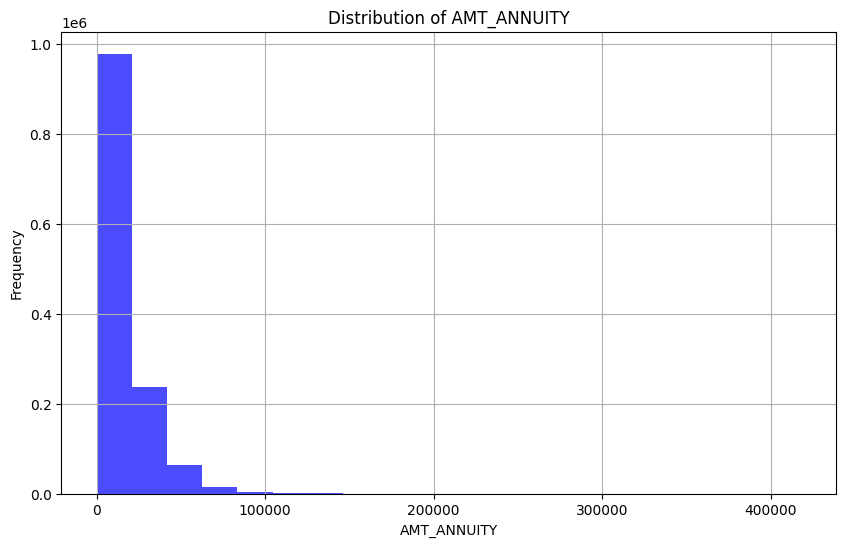

In [14]:
#AMT_ANNUITY 貸款年金(Annuity of previous application)
import pandas as pd
import matplotlib.pyplot as plt

file_path = "previous_application.csv"
data = pd.read_csv(file_path)

amt_annuity_values = data['AMT_ANNUITY'].dropna()

# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(amt_annuity_values, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of AMT_ANNUITY')
plt.xlabel('AMT_ANNUITY')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

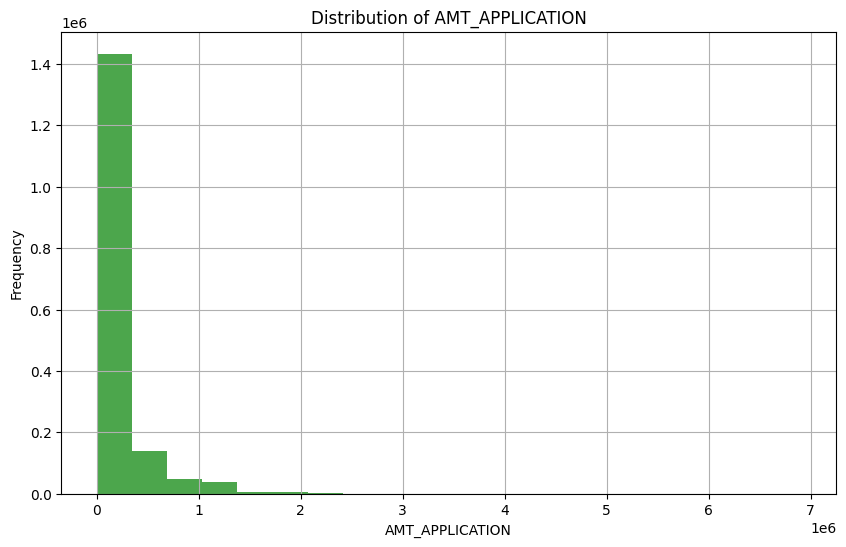

In [15]:
#AMT_APPLICATION 客户在之前申请中申请了多少额度 (跟AMT_ANNUITY 貸款年金 分布差不多)

amt_application_values = data['AMT_APPLICATION'].dropna()

# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(amt_application_values, bins=20, color='green', alpha=0.7)
plt.title('Distribution of AMT_APPLICATION')
plt.xlabel('AMT_APPLICATION')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

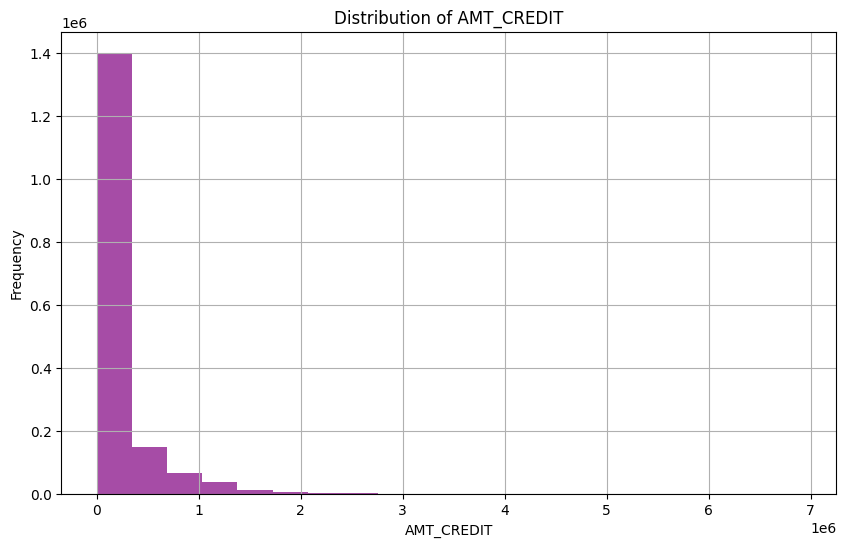

In [16]:
#AMT_CREDIT 客户之前申请里最终的信贷额度(最後核下來的錢)

amt_credit_values = data['AMT_CREDIT'].dropna()

# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(amt_credit_values, bins=20, color='purple', alpha=0.7)
plt.title('Distribution of AMT_CREDIT')
plt.xlabel('AMT_CREDIT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

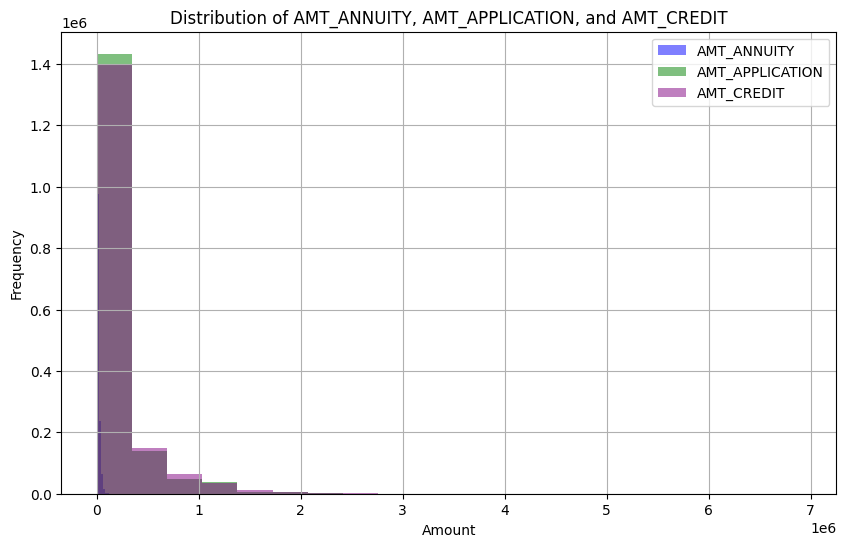

In [17]:
#AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT 差不多分布狀況

# Select non-null values from the columns
amt_annuity_values = data['AMT_ANNUITY'].dropna()
amt_application_values = data['AMT_APPLICATION'].dropna()
amt_credit_values = data['AMT_CREDIT'].dropna()

# Create overlapping histograms to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(amt_annuity_values, bins=20, color='blue', alpha=0.5, label='AMT_ANNUITY')
plt.hist(amt_application_values, bins=20, color='green', alpha=0.5, label='AMT_APPLICATION')
plt.hist(amt_credit_values, bins=20, color='purple', alpha=0.5, label='AMT_CREDIT')

plt.title('Distribution of AMT_ANNUITY, AMT_APPLICATION, and AMT_CREDIT')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

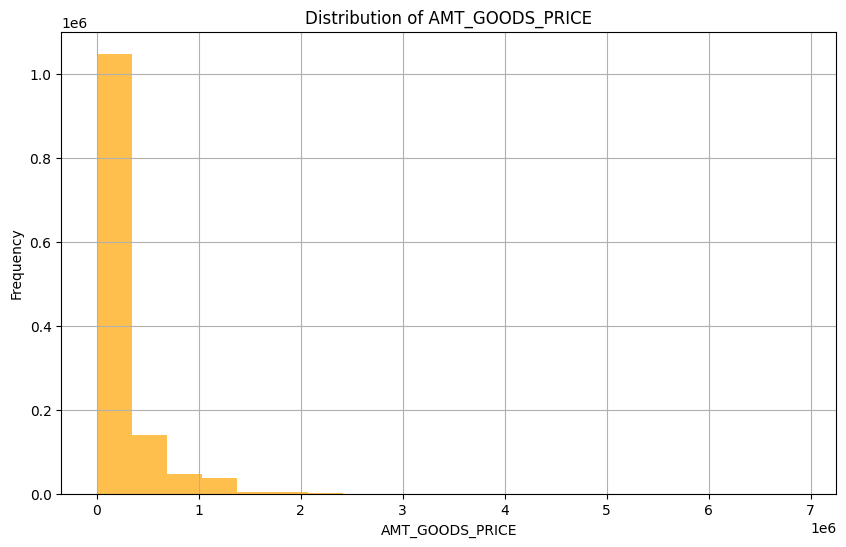

In [18]:
#AMT_GOODS_PRICE 先前申请中客户想要的商品價格

amt_goods_price_values = data['AMT_GOODS_PRICE'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(amt_goods_price_values, bins=20, color='orange', alpha=0.7)
plt.title('Distribution of AMT_GOODS_PRICE')
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

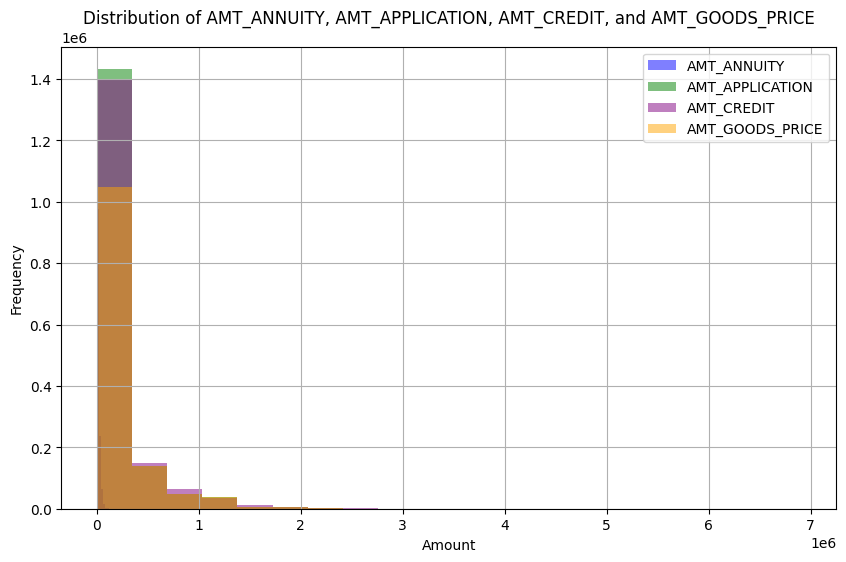

In [19]:
#AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE 差不多分布狀況

# Select non-null values from the columns
amt_annuity_values = data['AMT_ANNUITY'].dropna()
amt_application_values = data['AMT_APPLICATION'].dropna()
amt_credit_values = data['AMT_CREDIT'].dropna()
amt_goods_price= data['AMT_GOODS_PRICE'].dropna()

# Create overlapping histograms to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(amt_annuity_values, bins=20, color='blue', alpha=0.5, label='AMT_ANNUITY')
plt.hist(amt_application_values, bins=20, color='green', alpha=0.5, label='AMT_APPLICATION')
plt.hist(amt_credit_values, bins=20, color='purple', alpha=0.5, label='AMT_CREDIT')
plt.hist(amt_goods_price, bins=20, color='orange', alpha=0.5, label='AMT_GOODS_PRICE')

plt.title('Distribution of AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, and AMT_GOODS_PRICE' )
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
#★★★★★四欄位高度相關★★★★★★★★★

import pandas as pd


data = pd.read_csv('previous_application.csv')

# Select the columns of interest
columns_of_interest = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT','AMT_GOODS_PRICE']

# Calculate correlation matrix
correlation_matrix = data[columns_of_interest].corr()

# Display the correlation matrix
print(correlation_matrix)


                 AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE
AMT_ANNUITY         1.000000         0.808872    0.816429         0.820895
AMT_APPLICATION     0.808872         1.000000    0.975824         0.999884
AMT_CREDIT          0.816429         0.975824    1.000000         0.993087
AMT_GOODS_PRICE     0.820895         0.999884    0.993087         1.000000


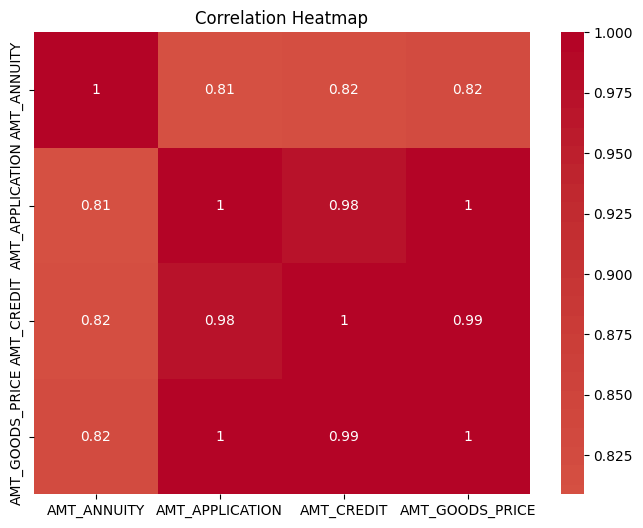

In [26]:
# Select the columns of interest
columns_of_interest = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE']

# Calculate correlation matrix
correlation_matrix = data[columns_of_interest].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [21]:
#★★★★<1>合併新欄位PRICE_TO_CREDIT_RATIO = 'AMT_GOODS_PRICE' / 'AMT_CREDIT'★★★★★★
#較低的比率可能表明借款人用於購買商品的信貸較少，這可能被視為更為保守的借款
#較高的比率可能意味著很大一部分信貸用於購買商品

import pandas as pd

df = pd.read_csv('previous_application.csv')

# Adding the new column
df['PRICE_TO_CREDIT_RATIO'] = df['AMT_GOODS_PRICE'] / df['AMT_CREDIT']

print(df)

         SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1               607500.0    679671.0         

In [22]:
#★★★★<2>合併新欄位Bank_Confidence_To_Person = 'AMT_CREDIT'/ 'AMT_APPLICATION' ★★★★★★
#銀行對貸款人的信心

df['Bank_Confidence_To_Person'] = df['AMT_CREDIT'] / df['AMT_APPLICATION']

print(df)

         SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1               607500.0    679671.0         

In [24]:
#★★★★★重新跑相關性★★★★★

# Calculate the correlation matrix
correlation_matrix = df[['AMT_ANNUITY', 'PRICE_TO_CREDIT_RATIO', 'Bank_Confidence_To_Person']].corr()

# Display the correlation matrix
print(correlation_matrix)

                           AMT_ANNUITY  PRICE_TO_CREDIT_RATIO  \
AMT_ANNUITY                   1.000000              -0.155644   
PRICE_TO_CREDIT_RATIO        -0.155644               1.000000   
Bank_Confidence_To_Person     0.193948              -0.758174   

                           Bank_Confidence_To_Person  
AMT_ANNUITY                                 0.193948  
PRICE_TO_CREDIT_RATIO                      -0.758174  
Bank_Confidence_To_Person                   1.000000  


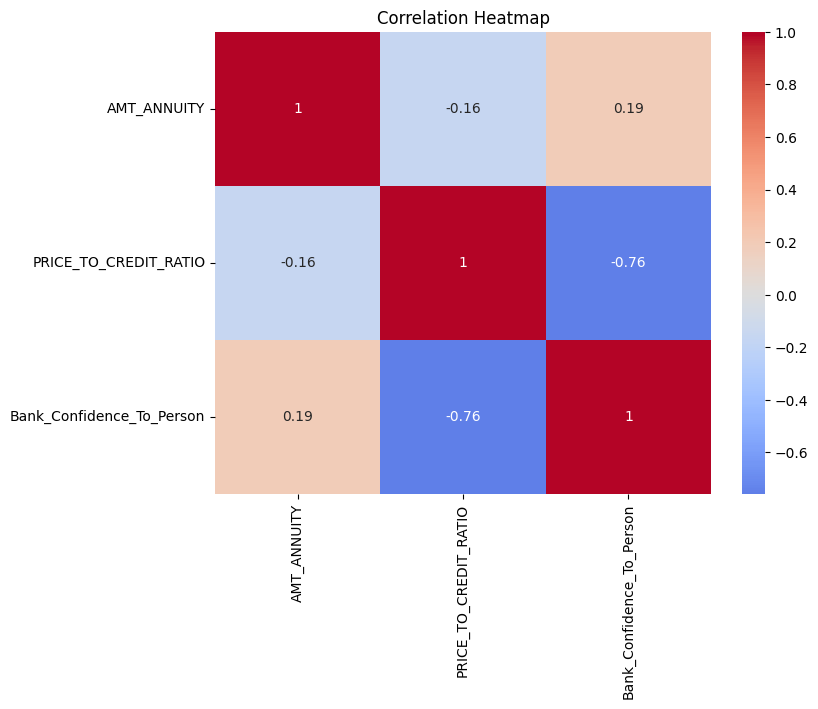

In [25]:
#★★★★★重新跑相關性 的 圖★★★★★

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['AMT_ANNUITY', 'PRICE_TO_CREDIT_RATIO', 'Bank_Confidence_To_Person']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

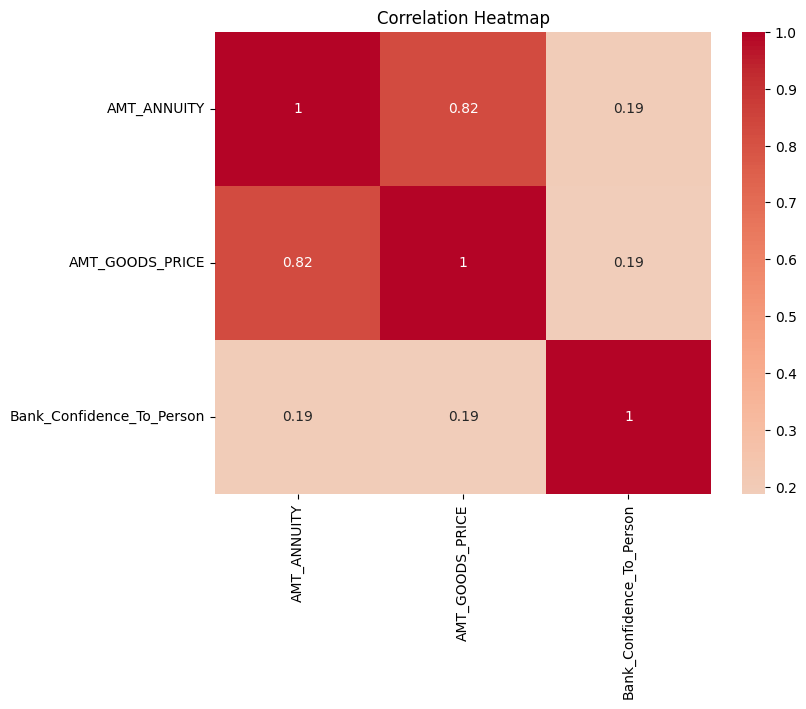

In [27]:
correlation_matrix = df[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'Bank_Confidence_To_Person']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

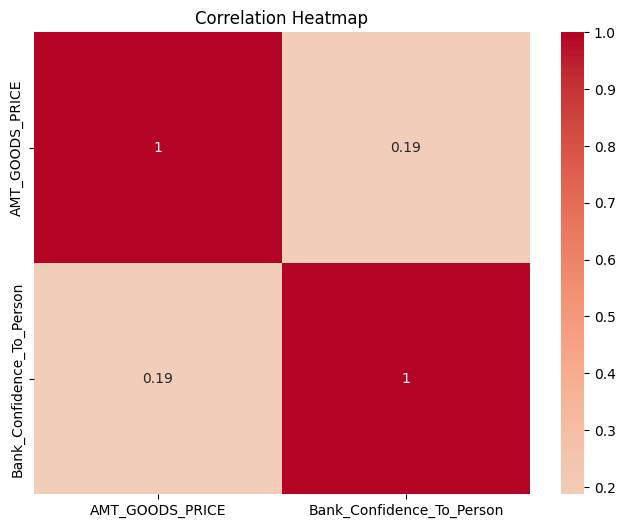

In [28]:
#★★★★★不取AMT_ANNUITY 重新跑相關性 的 圖★★★★★
#'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE' --> AMT_CREDIT/AMT_APPLICATION & AMT_GOODS_PRICE

correlation_matrix = df[[ 'AMT_GOODS_PRICE', 'Bank_Confidence_To_Person']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

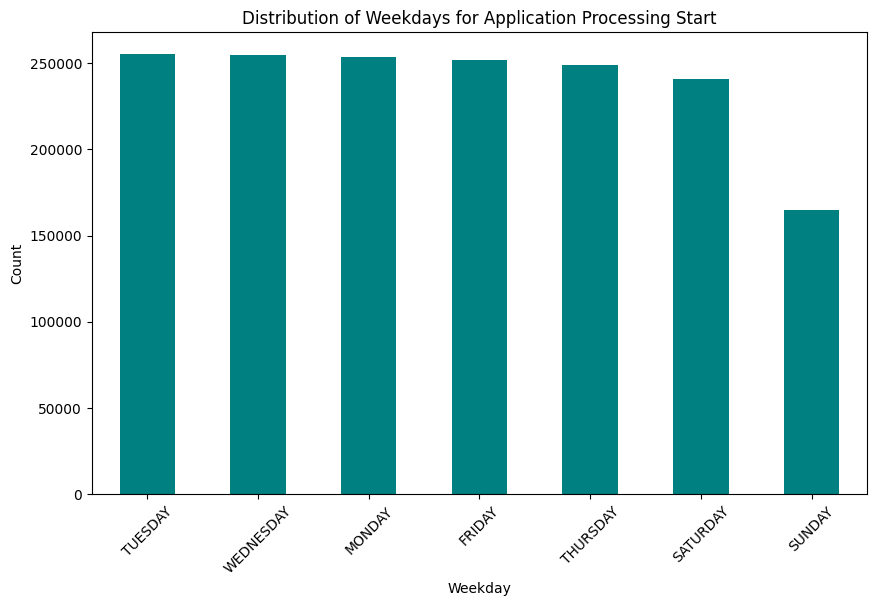

In [23]:
#WEEKDAY_APPR_PROCESS_START 先前申请中客户是在哪天申请的 (MONDAY至SUNDAY) ★星期二貸款好日

weekday_counts = data['WEEKDAY_APPR_PROCESS_START'].value_counts()

# Create a bar chart to visualize the distribution
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar', color='teal')
plt.title('Distribution of Weekdays for Application Processing Start')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

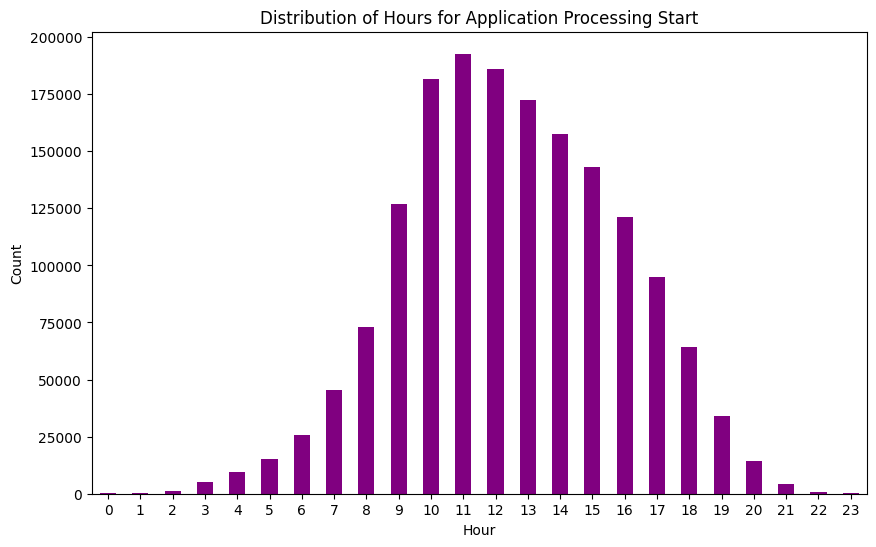

In [18]:
#HOUR_APPR_PROCESS_START 先前申请中客户大约在幾點申请的貸款 ★11點 貸款好時程

hour_counts = data['HOUR_APPR_PROCESS_START'].value_counts()

# Create a bar chart to visualize the distribution
plt.figure(figsize=(10, 6))
hour_counts.sort_index().plot(kind='bar', color='purple')
plt.title('Distribution of Hours for Application Processing Start')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [19]:
#NAME_CASH_LOAN_PURPOSE 現金貸款目的

# Group the data by 'NAME_CASH_LOAN_PURPOSE' and count occurrences
purpose_counts = data['NAME_CASH_LOAN_PURPOSE'].value_counts()

# Display the counts of loan purposes
print(purpose_counts)

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

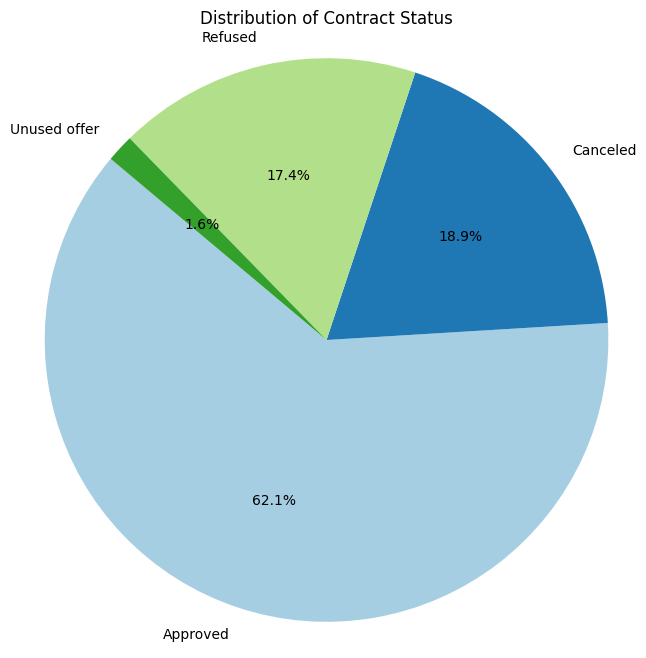

In [21]:
#NAME_CONTRACT_STATUS 先前申请的貸款状態 (Approved/Canceled/Refused/Unused offer)

contract_status_counts = data['NAME_CONTRACT_STATUS'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(contract_status_counts, labels=contract_status_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Contract Status')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

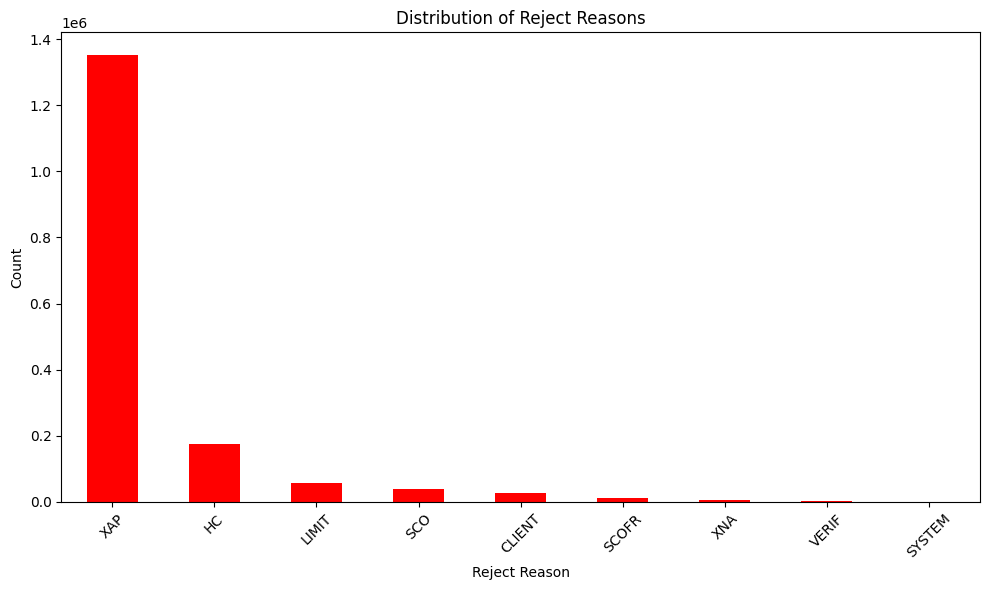

In [22]:
#CODE_REJECT_REASON 申请被拒绝原因

reject_reason_counts = data['CODE_REJECT_REASON'].value_counts()

# Create a bar chart to visualize the distribution
plt.figure(figsize=(10, 6))
reject_reason_counts.plot(kind='bar', color='red')
plt.title('Distribution of Reject Reasons')
plt.xlabel('Reject Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

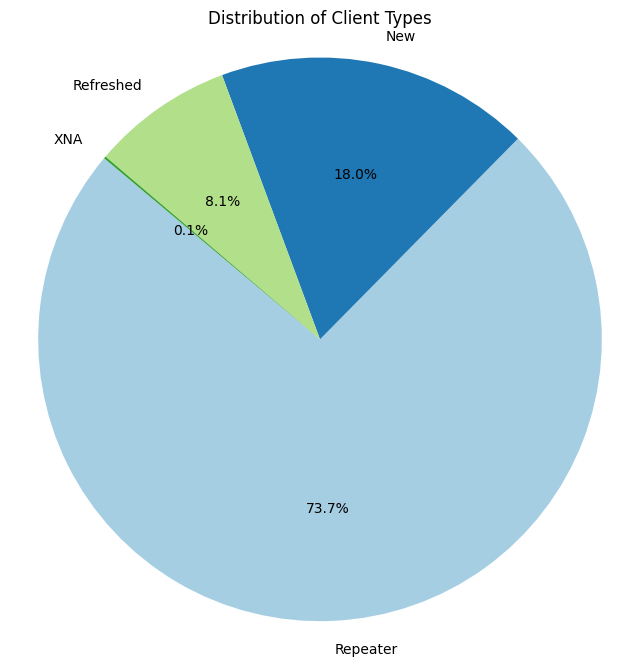

In [23]:
#NAME_CLIENT_TYPE 是否新老客户

client_type_counts = data['NAME_CLIENT_TYPE'].value_counts()

# Create a pie chart to visualize the distribution
plt.figure(figsize=(8, 8))
plt.pie(client_type_counts, labels=client_type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Client Types')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

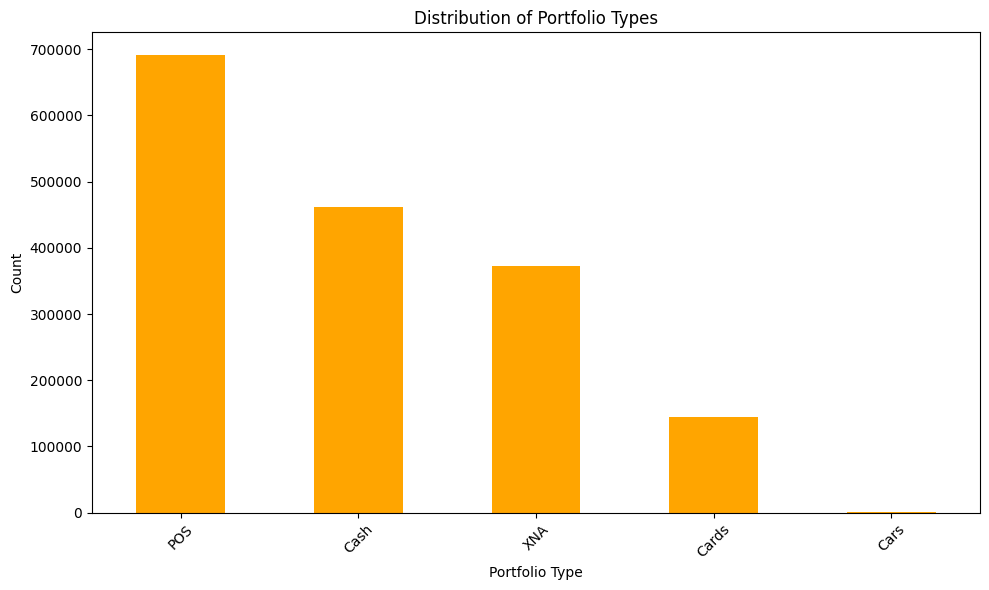

In [24]:
#NAME_PORTFOLIO 之前的申请是為了CASH，POS，CAR (CASH/POS/CAR/Cards/XNA)

portfolio_counts = data['NAME_PORTFOLIO'].value_counts()

# Create a bar chart to visualize the distribution
plt.figure(figsize=(10, 6))
portfolio_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Portfolio Types')
plt.xlabel('Portfolio Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Debit_Income_Ratio 不同類型貸款(ex車貸、信用貸...) / 收入

In [25]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [26]:
application_train = pd.read_csv('application_train.csv')
previous_application = pd.read_csv("previous_application.csv")

In [28]:
previous_application=previous_application.sort_values(by=['SK_ID_CURR','SK_ID_PREV'])
previous_application.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
201668,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,...,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0
892077,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1223745,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
1021650,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
935548,1564014,100004,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
1259112,1857999,100005,Cash loans,NaN,0.0,0.0,NaN,NaN,FRIDAY,10,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1378978,2495675,100005,Consumer loans,4813.200,44617.5,40153.5,4464.0,44617.5,THURSDAY,11,...,Connectivity,12.0,high,POS mobile with interest,365243.0,-706.0,-376.0,-466.0,-460.0,0.0
1131133,1020698,100006,Cash loans,39954.510,454500.0,481495.5,NaN,454500.0,SATURDAY,12,...,XNA,18.0,high,Cash X-Sell: high,NaN,NaN,NaN,NaN,NaN,NaN
1232752,1243599,100006,Cash loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
application_train = application_train[['SK_ID_CURR','AMT_ANNUITY','AMT_INCOME_TOTAL']]
application_train.sort_values(by=['SK_ID_CURR',])

,SK_ID_CURR,AMT_ANNUITY,AMT_INCOME_TOTAL
0,100002,24700.5,202500.0
1,100003,35698.5,270000.0
2,100004,6750.0,67500.0
3,100006,29686.5,135000.0
4,100007,21865.5,121500.0
...,...,...,...
307506,456251,27558.0,157500.0
307507,456252,12001.5,72000.0
307508,456253,29979.0,153000.0
307509,456254,20205.0,171000.0


In [30]:
#計算每個人過去總貸款每期應付款金額
prev_amt_annuity_sum = previous_application[["SK_ID_CURR","AMT_ANNUITY"]].groupby("SK_ID_CURR").sum().rename(columns={
            "AMT_ANNUITY": "prev_amt_annuity_sum"})
print(prev_amt_annuity_sum)
#合併到train
application_train = application_train[['SK_ID_CURR','AMT_ANNUITY','AMT_INCOME_TOTAL']]
Debt_Income_Ratio = application_train.merge(prev_amt_annuity_sum, on='SK_ID_CURR')
#將過去每期應付金額加上現在應附金額 / 每月收入 計算貸款收入率
Debt_Income_Ratio = (Debt_Income_Ratio.prev_amt_annuity_sum + Debt_Income_Ratio.AMT_ANNUITY)/Debt_Income_Ratio.AMT_INCOME_TOTAL
Debt_Income_Ratio = pd.DataFrame(Debt_Income_Ratio,columns=["Debt_Income_Ratio"])
Debt_Income_Ratio.info()
print(Debt_Income_Ratio.head(20))
#計算貸款收入率大於1的值有幾個 = 貸款金額比收入高的有幾人
Debt_Income_Ratio_Negative = (Debt_Income_Ratio.Debt_Income_Ratio > 1).sum()

print('----------------------------')
print(f"大於1的值有:{Debt_Income_Ratio_Negative}個")

            prev_amt_annuity_sum
SK_ID_CURR                      
100001                  3951.000
100002                  9251.775
100003                169661.970
100004                  5357.250
100005                  4813.200
...                          ...
456251                  6605.910
456252                 10074.465
456253                  9540.810
456254                 21362.265
456255                166203.135

[338857 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 291057 entries, 0 to 291056
Data columns (total 1 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Debt_Income_Ratio  291045 non-null  float64
dtypes: float64(1)
memory usage: 4.4 MB
    Debt_Income_Ratio
0            0.167666
1            0.760594
2            0.179367
3            1.271063
4            0.786324
5            0.917942
6            0.652988
7            0.193162
8            0.788765
9            0.325426
10   